In [81]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(4)

In [82]:
dfs_dict = pickle.load(open("data/timeline-di.p", "rb"))

In [83]:
gameids = list(dfs_dict.keys())
np.random.shuffle(gameids)

In [84]:
idcount = len(gameids)
splits = [int(idcount*i) for i in [0,.8,.9,1]]
np.random.shuffle(gameids)
train_ids = gameids[splits[0]:splits[1]]

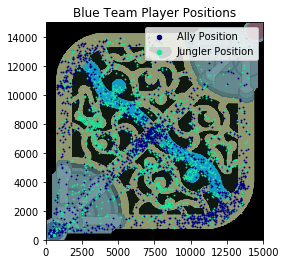

In [92]:
plt.xlim(0,15000)
plt.ylim(0,15000)
img = plt.imread("data/map.png")
plt.imshow(img, extent=[0,15000,0,15000],)
plt.title("Blue Team Player Positions")
for i in train_ids:
    if dfs_dict[i]["ally_side"].iloc[0]==0:
        plt.scatter(dfs_dict[i]["ally1x"], dfs_dict[i]["ally1y"], marker=".",
                    color=(.0,0,.5), s=3)
        plt.scatter(dfs_dict[i]["playerx"], dfs_dict[i]["playery"],marker=".",
                    color=(.1,.9,.6), s=3)
"""plt.scatter(dfs_dict[i]["ally1x"], dfs_dict[i]["ally1y"], marker="o",
            color=(0,0,.5), s=3, label="Ally position")
plt.scatter(dfs_dict[i]["playerx"], dfs_dict[i]["playery"],marker="o",
            color=(.1,.9,.6), s=3, label="Jungler position")
"""
plt.scatter(None, None, marker="o",
            color=(0,0,.5), s=20, label="Ally Position")
plt.scatter(None, None,marker="o",
            color=(.1,.9,.6), s=20, label="Jungler Position")
plt.legend()
plt.savefig("images/player-pos.png")

In [86]:
ally_columns = list(filter(lambda x: x.startswith("ally1"),dfs_dict[i].columns))
player_columns = list(filter(lambda x: x.startswith("player"),dfs_dict[i].columns))
# drop x and y
player_columns = player_columns[:-2]
ally_columns = ally_columns[:-2]

In [87]:
player_end_stats = []
ally_end_stats = []
for i in train_ids:
    player_end_stat = dfs_dict[i].iloc[15][player_columns]
    ally_end_stat = dfs_dict[i].iloc[15][ally_columns]
    player_end_stats.append(player_end_stat)
    ally_end_stats.append(ally_end_stat)
    

In [88]:
player_df = pd.concat(player_end_stats, axis=1).T
ally_df = pd.concat(ally_end_stats, axis=1).T
player_df["id"] = train_ids
ally_df["id"] = train_ids
player_df = player_df.reset_index(drop=True)
ally_df = ally_df.reset_index(drop=True)
player_df

,playercurrentGold,playertotalGold,playerlevel,playerjungleMinionsKilled,id
0,297,6387,9,72,4371938229
1,2473,6223,10,72,4446420179
2,281,5421,8,70,4763248630
3,553,5903,9,66,4364006121
4,438,5313,8,57,4484596745
...,...,...,...,...,...
155,313,6213,9,68,4103185314
156,1852,6252,9,77,4111590787
157,541,5341,9,72,4476545133
158,204,5479,10,86,4633492176


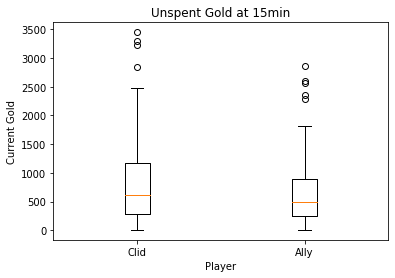

In [89]:
plt.boxplot([player_df['playercurrentGold'],ally_df['ally1currentGold']])
plt.ylabel("Current Gold")
plt.xticks([1,2],["Clid", "Ally"])
plt.xlabel("Player")
plt.title("Unspent Gold at 15min")
plt.savefig("images/current-gold-plot.png")

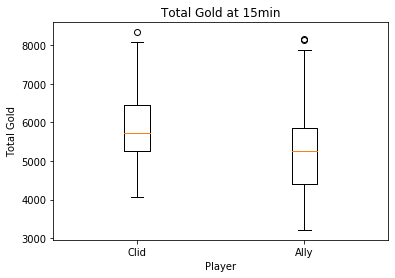

In [90]:
plt.boxplot([player_df['playertotalGold'],ally_df['ally1totalGold']])
plt.ylabel("Total Gold")
plt.xticks([1,2],["Clid", "Ally"])
plt.xlabel("Player")
plt.title("Total Gold at 15min")
plt.savefig("images/total-gold-plot.png")

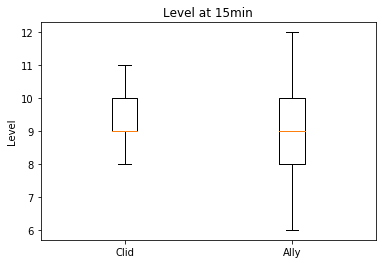

In [93]:
plt.boxplot([player_df['playerlevel'],ally_df['ally1level']])
plt.ylabel("Level")
plt.xticks([1,2],["Clid", "Ally"])
#plt.xlabel("Player")
plt.title("Level at 15min")
plt.savefig("images/level-plot.png")